# Playing with scikit-image

install from https://anaconda.org/anaconda/scikit-image

documentation from http://scikit-image.org/docs/stable/user_guide/getting_started.html


In [1]:

import skimage
from skimage import data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [118]:
for c in range(0,7):
    print (c)

0
1
2
3
4
5
6


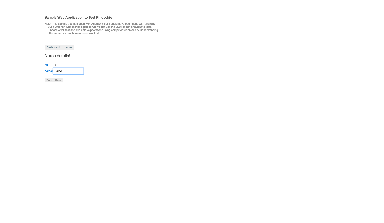

(1080, 1920, 4)

In [3]:
import os
images_path='.'
filename = os.path.join(images_path, '2-select_name_field.png')
from skimage import io
page1 = io.imread(filename)
plt.imshow(page1, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
page1.shape

In [4]:
import numpy as np

def show_images(images,titles=None):
    """Display a list of images"""
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n) # Make subplot
        if image.ndim == 2: # Is image grayscale?
            plt.gray() # Only place in this blog you can't replace 'gray' with 'grey'
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


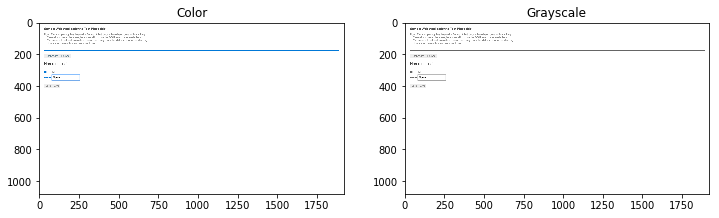

Colored image shape:
 (1080, 1920, 4)
Grayscale image  shape:
 (1080, 1920)


In [5]:
from skimage.color import rgb2gray

gray_image = rgb2gray(page1)
show_images(images=[page1,gray_image],
            titles=["Color","Grayscale"])

print ("Colored image shape:\n", page1.shape)
print ("Grayscale image  shape:\n", gray_image.shape)

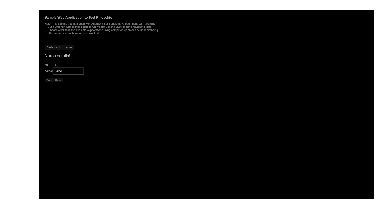

(1080, 1920)

In [7]:
from PIL import Image
from numpy import array
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

gray_image

plt.imshow(gray_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
gray_image.shape


In [45]:
page1[0,0]

array([255, 255, 255, 255], dtype=uint8)

(77994, 0.037612847222222225)

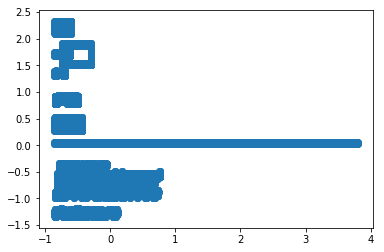

In [88]:
import pandas as pd
points = []
for x in range(1080):
    for y in range(1920):
        if (gray_image[x,y] != 1.0):
            points.append([x,y])
Xraw = pd.DataFrame(points)

X = StandardScaler().fit_transform(Xraw)

XP = pd.DataFrame(X)

plt.scatter(XP[1],XP[0])

XP.size, XP.size / (1080 * 1920)


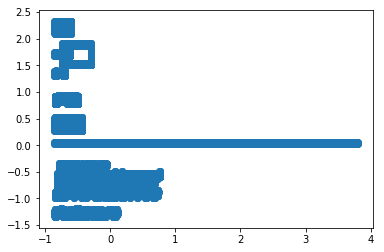

In [89]:
plt.scatter(XP[1],XP[0])

In [90]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.1, min_samples=100).fit(XP)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

7

# Amazing  Encontramos 7 clusters!!

## ahora voy a calcular el maximo 
## y minimo punto de cada cluster

In [119]:
for c in range(0,7):
    Xraw0 = Xraw[db.labels_==c]
    Xraw1 = Xraw0.append([[0,0],[1080, 1920]])
    Xraw0.size, Xraw.size
    print("cluster: ", c, "max: " , Xraw0[0].max(), Xraw0[1].max(), "  min: " ,Xraw0[0].min(), Xraw0[1].min() )

cluster:  0 max:  52 419   min:  34 32
cluster:  1 max:  138 681   min:  72 33
cluster:  2 max:  179 1887   min:  176 32
cluster:  3 max:  227 201   min:  200 32
cluster:  4 max:  270 177   min:  252 33
cluster:  5 max:  370 259   min:  306 32
cluster:  6 max:  413 134   min:  388 32


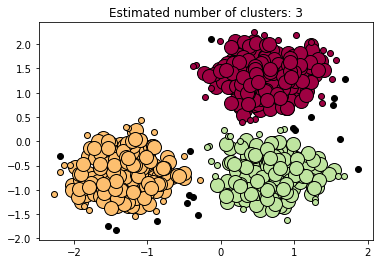

In [48]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

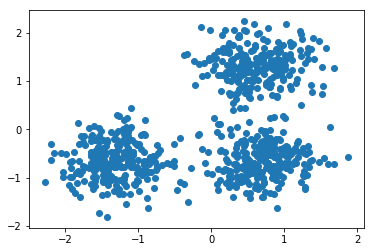

In [42]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)



XP = pd.DataFrame(X)

plt.scatter(XP[0],XP[1])

In [11]:
from sklearn.cluster import DBSCAN
from sklearn import manifold, datasets, decomposition, discriminant_analysis
from matplotlib import offsetbox
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(gray_image)
plt.show(X_reduced_tsne.all)


In [13]:
db = DBSCAN(eps=0.3,min_samples=10).fit(gray_image.data)
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [14]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
# db.fit_predict(gray_image,y=None,sample_weight=None)
y_pred = db.labels_.astype(np.int)

Estimated number of clusters: 3


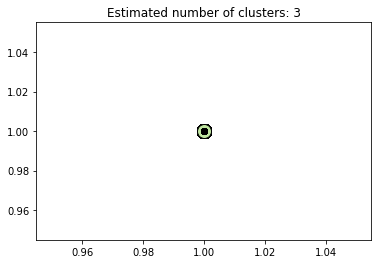

In [17]:
from sklearn import metrics
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true=db.axis=0

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = gray_image[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = gray_image[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
